# Problem Statement- Credit Card Customer Segmentation

###### Key Question
1. How many different segments of customers are there?
2. How are these segments different from each other?
3. What are your recommendations to the bank on how to better market to and
service these customers?

###### Data
Customer key - Identifier for the customer
Average Credit Limit - Average credit limit across all the credit cards
Total credit cards - Total number of credit cards
Total visits bank - Total number of bank visits
Total visits online - total number of online visits
Total calls made - Total number of calls made by the customer

###### Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist

In [ ]:
###### EDA Analysis

In [3]:
df = pd.read_csv("Credit Card Customer Data.csv")

In [4]:
df.head()
# Seven columns: First two columns are Index type or refrence numbers, rest are variables

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [5]:
df.shape # 660 rows and 7 columns

(660, 7)

In [6]:
df.info() # All data type is integers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [7]:
df.isna().sum() # to check null/missing values 

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [8]:
df_dup=df[df.duplicated(['Customer Key'],keep=False)] # To check duplicate rows/values

In [9]:
df_dup.sort_values(by=['Customer Key']) # There are 5 cutomer keys have duplicate customer Keys. But looking at data
variables have different numbers and SI_No has different values. Any how these are tiny part of data- Lets see in process how we deal with it
if they are outliers are not?

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
48,49,37252,6000,4,0,2,8
432,433,37252,59000,6,2,1,2
4,5,47437,100000,6,0,12,3
332,333,47437,17000,7,3,1,0
411,412,50706,44000,4,5,0,2
541,542,50706,60000,7,5,2,2
391,392,96929,13000,4,5,0,0
398,399,96929,67000,6,2,2,2
104,105,97935,17000,2,1,2,10
632,633,97935,187000,7,1,7,0


In [10]:
df # Data snapshot

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0


In [11]:
#del df['Customer Key'] Removing Customer key as we have index values
df

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0


In [12]:
df.describe().T # Statistical analysis of , Data shows Ave_credit Limit has huge (max) std - We probably has to normalise data

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


######  Univariate Analysis

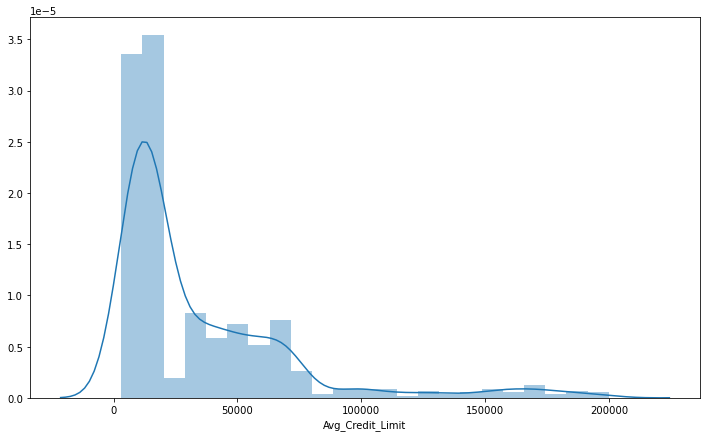

In [13]:
plt.figure (figsize=(12,7))
sns.distplot(df.Avg_Credit_Limit)
# Majority of the cards have no credit or very low limit. Right skewed

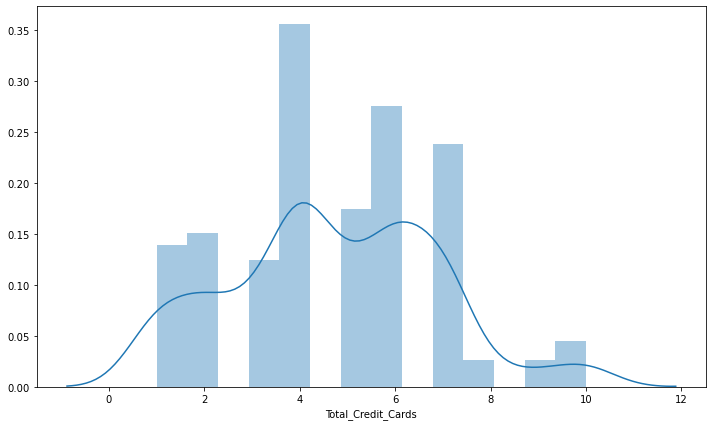

In [14]:
plt.figure (figsize=(12,7))
sns.distplot(df.Total_Credit_Cards)
# Normal distribution - Users have multiple cards

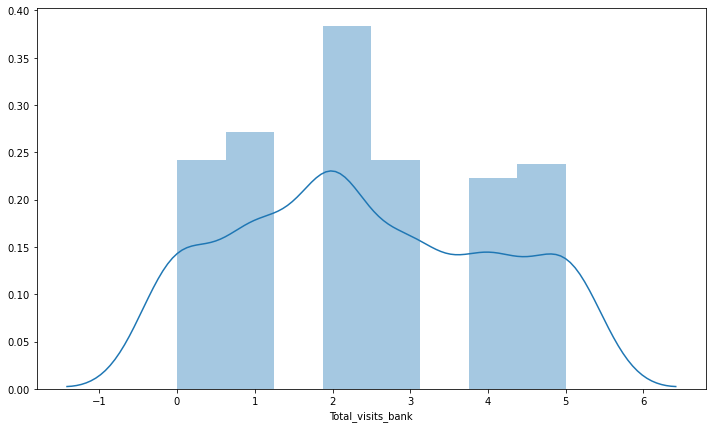

In [15]:
plt.figure (figsize=(12,7))
sns.distplot(df.Total_visits_bank)
Normal distribution of data- We have to see visits made by clients have what relation with Creidt limit or No of cards

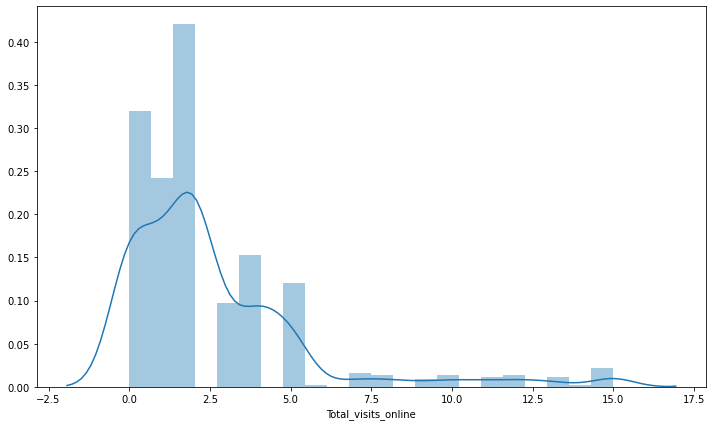

In [16]:
plt.figure (figsize=(12,7))
sns.distplot(df.Total_visits_online)
#Right skewed data, majority of the data lies in range where no online visit or very few attempts on line.

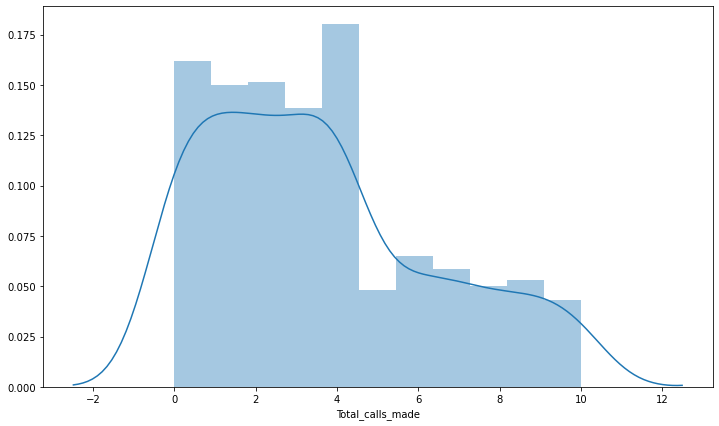

In [17]:
plt.figure (figsize=(12,7))
sns.distplot(df.Total_calls_made)
#Bimodal distribution of total calls made- Majority data is towards low no of calls made.

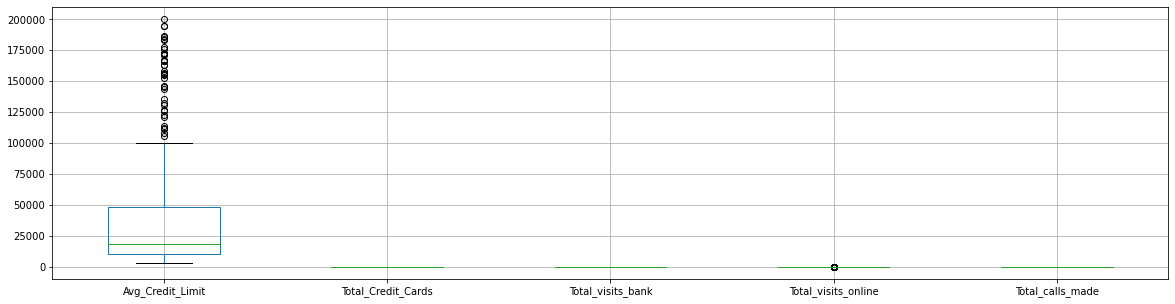

In [18]:
df2=df.drop(['Sl_No', 'Customer Key'], axis=1)
df2.boxplot(figsize=(20,5))
# Due to large scale varaition in Y axis of variables- comparision is difficult, 
Ave credit cards shows large data as outliers- For better analysis we will normalise data in coming steps

In [19]:
df2.describe().T
# As decribed above Total credit card limit variable has very high std- so normalisation/scaling is required.

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.0,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.0,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.0,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.0,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.0,3.0,5.0,10.0


###### BiVariate Analysis

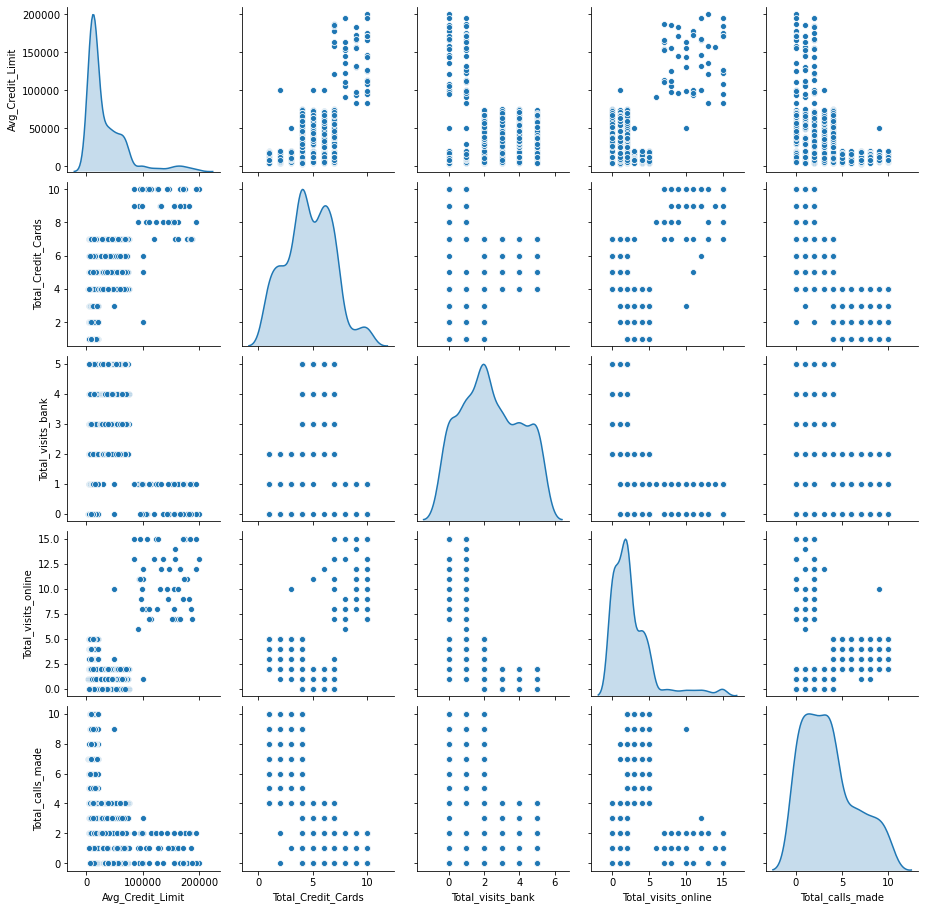

In [20]:
sns.pairplot(df2[['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made' ]], diag_kind='kde');

In [ ]:
#Above pairplot- shows most of data right skewed & multi peak distribution. Ave Credit Limit, Total Cards and Total online visits shows some correlation.

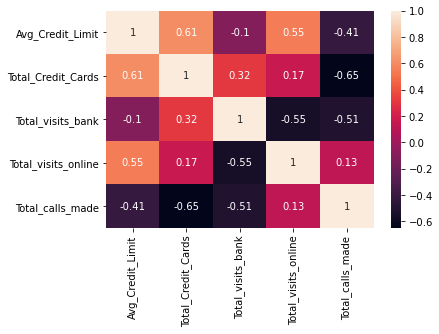

In [21]:
sns.heatmap(df2[['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']].corr(), annot=True);

In [ ]:
Heatmap shows relatively better correlation between Credit card limit- & Total credit Cards. Then Total Visit online and Credit card limit. 

In [22]:
df2.median()

Avg_Credit_Limit       18000.0
Total_Credit_Cards         5.0
Total_visits_bank          2.0
Total_visits_online        2.0
Total_calls_made           3.0
dtype: float64

In [23]:
from scipy.stats import zscore
df2scaled=df2.apply(zscore)
df2scaled.head()
# to normalise data

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


In [24]:
df2scaled.describe().T # Statistical Analysis afetr scaling data

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,660.0,8.195465e-16,1.000758,-0.839808,-0.653623,-0.440840,0.357097,4.399975
Total_Credit_Cards,660.0,-4.006223e-15,1.000758,-1.710864,-0.787585,0.135694,0.597334,2.443892
Total_visits_bank,660.0,1.157323e-16,1.000758,-1.473731,-0.860451,-0.247170,0.979390,1.592670
Total_visits_online,660.0,1.944572e-16,1.000758,-0.888380,-0.547490,-0.206600,0.475180,4.224968
Total_calls_made,660.0,-7.112156e-16,1.000758,-1.251537,-0.902271,-0.203739,0.494794,2.241125


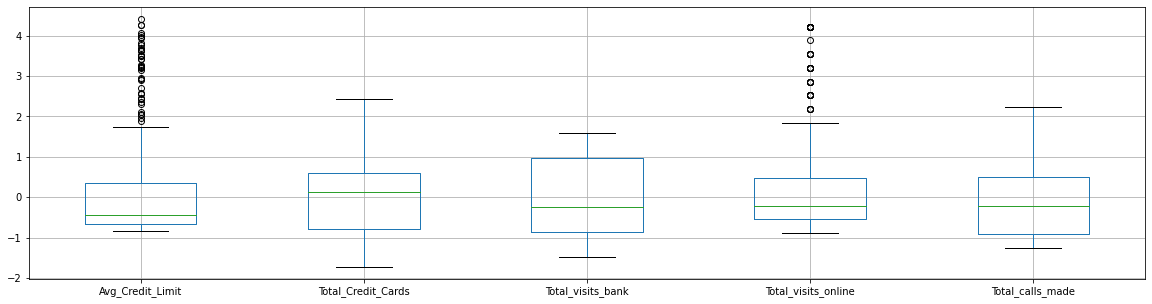

In [25]:
df2scaled.boxplot(figsize=(20,5)) # after scaling data we see two variables have data outliers- Lets keep this data as it is to see how it impact

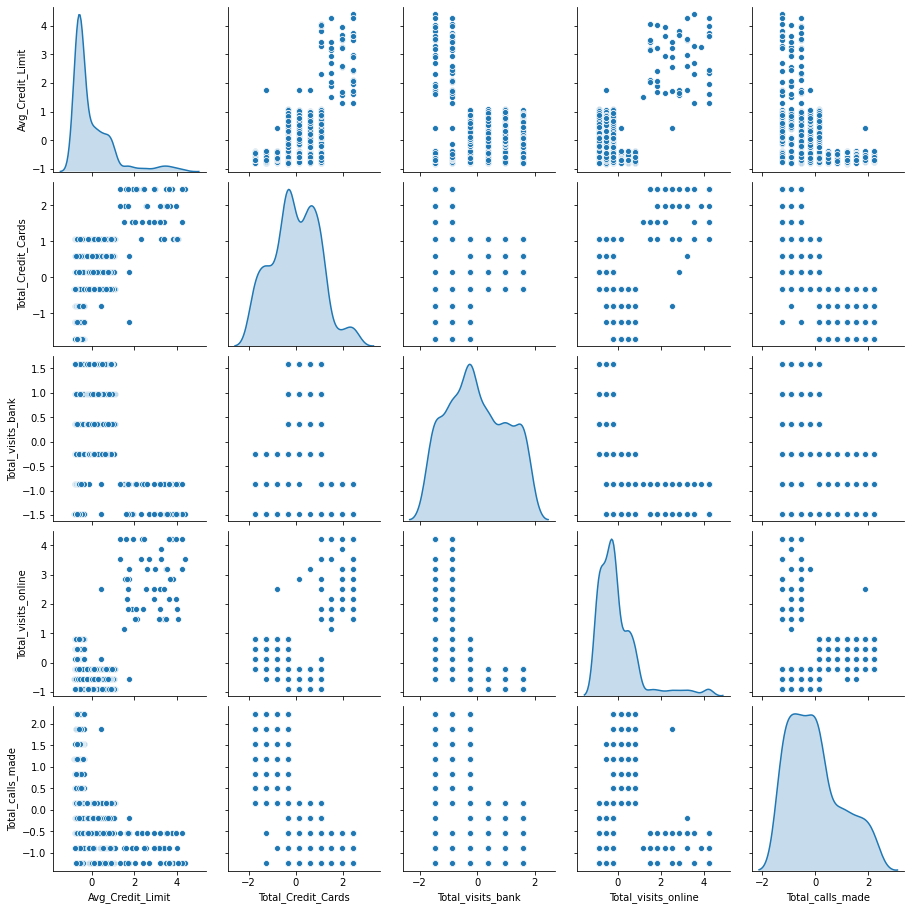

In [26]:
sns.pairplot(df2scaled, diag_kind='kde') # after scaling data comparison plot among variables
# same as described above - Guassian distribution- Credit card limit, cards and online visits shows +ve correlation.

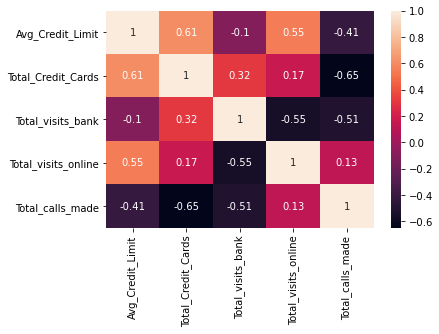

In [27]:
sns.heatmap(df2scaled.corr(), annot=True)

######  3 methods of  Bank Use: 1- Online Visits, 2- Bank Visit, 3- Call Bank,  Assuming data clusters around these options- lets explore their relations with other variables.

In [ ]:
# Part Two K-Means
# K-means clustering method to find k- Value we use Elbow method

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

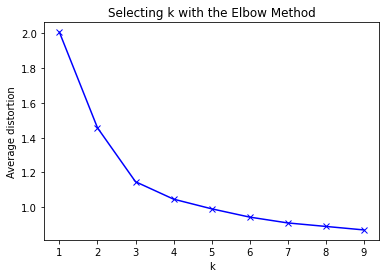

In [28]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(df2scaled)
    prediction=model.predict(df2scaled)
    meanDistortions.append(sum(np.min(cdist(df2scaled, model.cluster_centers_, 'euclidean'), axis=1)) / df2scaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [ ]:
# Two k numbers K=3 and K=4, Obvious elbow is at K=3
#Model with K=3 First

In [29]:
# Let us first start with K = 3
final_model=KMeans(3)
final_model.fit(df2scaled)
prediction=final_model.predict(df2scaled)

#Append the prediction 
df2scaled["GROUP"] = prediction
print("Groups Assigned : \n")
df2scaled.head(10)

Groups Assigned : 



,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,2
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,1
2,0.410293,1.058973,-0.860451,0.134290,0.145528,2
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528,2
4,1.740187,0.597334,-1.473731,3.202298,-0.203739,0
5,-0.387644,-0.787585,-1.473731,-0.547490,1.542593,1
6,1.740187,0.135694,-1.473731,2.861408,-0.553005,0
7,-0.520633,-0.787585,-1.473731,-0.547490,-0.902271,1
8,-0.786612,-1.249225,-1.473731,-0.206600,-0.553005,1
9,-0.839808,-0.325946,-1.473731,-0.547490,1.193326,1


In [30]:
from sklearn.metrics import silhouette_score
labels = model.labels_
silhouette_score(df2scaled, labels, metric='euclidean')
# Silhouette Score is very low= 0.22

0.219132541645887

In [31]:
df2Clust = df2scaled.groupby(['GROUP'])
df2Clust.mean() 

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,
0,2.831764,1.862226,-1.105763,2.827319,-0.874330
1,-0.595796,-1.059623,-0.901518,0.322997,1.148109
2,-0.021062,0.373690,0.666395,-0.553672,-0.553005


In [32]:
#Boxplot of groups by K-mean analysis 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A3806404F0>,
      dtype=object)

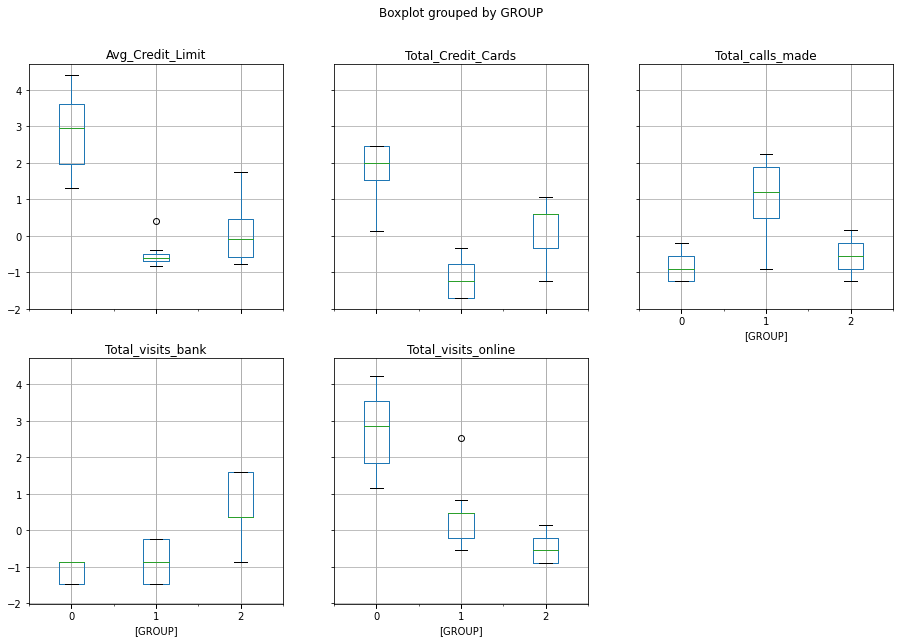

In [89]:
df2scaled.boxplot(by='GROUP', layout = (2,3), figsize=(15,10))

In [ ]:
#with 3 clutsers we observed that High avg credit limit group has high no credit card, has used online banking more than other group.
#The customers who made most calls to bank have lowest credit limits and no of cards

###### Hierarchical Clustering

In [ ]:
# For this analysis, we get clusters by using agglometriveClustering with different Linkage. 

In [36]:
from scipy.stats import zscore
df3scaled=df2.apply(zscore)
df3scaled.head()
#df3 data will be used for hierarchical clustering

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


In [37]:
from sklearn.cluster import AgglomerativeClustering

In [38]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')

In [39]:
model.fit(df3scaled)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [40]:
df3scaled['Labels']= model.labels_
df3scaled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Labels
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,0
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,2
2,0.410293,1.058973,-0.860451,0.134290,0.145528,0
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528,0
4,1.740187,0.597334,-1.473731,3.202298,-0.203739,1


In [41]:
df3scaled=df3scaled.groupby(['Labels'])

In [42]:
df3scaled.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Labels,,,,,
0,-0.022902,0.371882,0.664034,-0.552775,-0.551200
1,2.831764,1.862226,-1.105763,2.827319,-0.874330
2,-0.595179,-1.062913,-0.904453,0.325372,1.152605


In [43]:
df3scaled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Labels
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,0
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,2
2,0.410293,1.058973,-0.860451,0.134290,0.145528,0
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528,0
4,1.740187,0.597334,-1.473731,3.202298,-0.203739,1
5,-0.387644,-0.787585,-1.473731,-0.547490,1.542593,2
6,1.740187,0.135694,-1.473731,2.861408,-0.553005,1
7,-0.520633,-0.787585,-1.473731,-0.547490,-0.902271,2
8,-0.786612,-1.249225,-1.473731,-0.206600,-0.553005,2
9,-0.839808,-0.325946,-1.473731,-0.547490,1.193326,2


In [44]:
from scipy.stats import zscore
df3s_com=df2.apply(zscore)
df3s_com.head()
# scaling again generating data with different name

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


In [45]:
from sklearn.cluster import AgglomerativeClustering

In [46]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='complete')

In [47]:
model.fit(df3s_com)

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [48]:
df3s_com['Labels']= model.labels_
df3s_com.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Labels
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,0
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,2
2,0.410293,1.058973,-0.860451,0.134290,0.145528,0
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528,0
4,1.740187,0.597334,-1.473731,3.202298,-0.203739,1


In [49]:
df3s_com=df3s_com.groupby(['Labels'])

In [50]:
df3s_com.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Labels,,,,,
0,-0.037852,0.348490,0.614820,-0.544055,-0.531891
1,2.831764,1.862226,-1.105763,2.827319,-0.874330
2,-0.594183,-1.086676,-0.886364,0.350347,1.196606


In [51]:
from scipy.stats import zscore
df3s_ward=df2.apply(zscore)
df3s_ward.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


In [52]:
from sklearn.cluster import AgglomerativeClustering

In [53]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='ward')

In [54]:
model.fit(df3s_ward)

AgglomerativeClustering(n_clusters=3)

In [55]:
df3s_ward['Labels']= model.labels_
df3s_ward.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Labels
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,0
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,1
2,0.410293,1.058973,-0.860451,0.134290,0.145528,0
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528,0
4,1.740187,0.597334,-1.473731,3.202298,-0.203739,2


In [56]:
df3s_ward=df3s_ward.groupby(['Labels'])

In [57]:
df3scaled.mean()
#Linkage Average

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Labels,,,,,
0,-0.022902,0.371882,0.664034,-0.552775,-0.551200
1,2.831764,1.862226,-1.105763,2.827319,-0.874330
2,-0.595179,-1.062913,-0.904453,0.325372,1.152605


In [58]:
df3s_ward.mean()
#Linkage Ward

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Labels,,,,,
0,-0.019212,0.374308,0.668767,-0.554573,-0.554819
1,-0.596408,-1.054310,-0.898610,0.320643,1.143653
2,2.831764,1.862226,-1.105763,2.827319,-0.874330


In [59]:
df3s_com.mean()
#Linkage Complete

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Labels,,,,,
0,-0.037852,0.348490,0.614820,-0.544055,-0.531891
1,2.831764,1.862226,-1.105763,2.827319,-0.874330
2,-0.594183,-1.086676,-0.886364,0.350347,1.196606


In [ ]:
# Using 3 different Linkage (complete, ward, and average)- we got means results of these types. We see  very subtle differences.

In [60]:
df2

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3
...,...,...,...,...,...
655,99000,10,1,10,0
656,84000,10,1,13,2
657,145000,8,1,9,1
658,172000,10,1,15,0


In [61]:
from scipy.stats import zscore
df4scaled=df2.apply(zscore)
df4scaled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


In [ ]:
#Computing Z, Cophenet, silhouette, dendrogram, with 3 linkage (Complete, average, ward)

In [62]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

In [63]:
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

In [64]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(df4scaled, metric='euclidean', method="complete")
Z.shape

(659, 4)

In [65]:
c, coph_dists = cophenet(Z , pdist(df4scaled))
c
# c=0.86  very good score

0.8599730607972423

Text(0.5, 1.0, 'selecting k with the silhouette score')

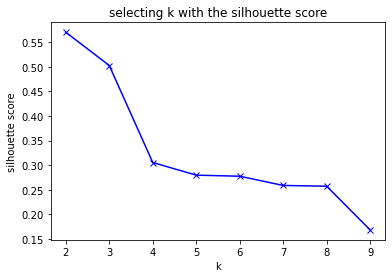

In [66]:
from sklearn.cluster import AgglomerativeClustering
meanDistortions=[]
for k in range (2,10):
    model=AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='complete')
    model.fit(df4scaled)
    prediction=model.labels_
    meanDistortions.append(silhouette_score(df4scaled, prediction))


plt.plot(range(2,10), meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.title('selecting k with the silhouette score')

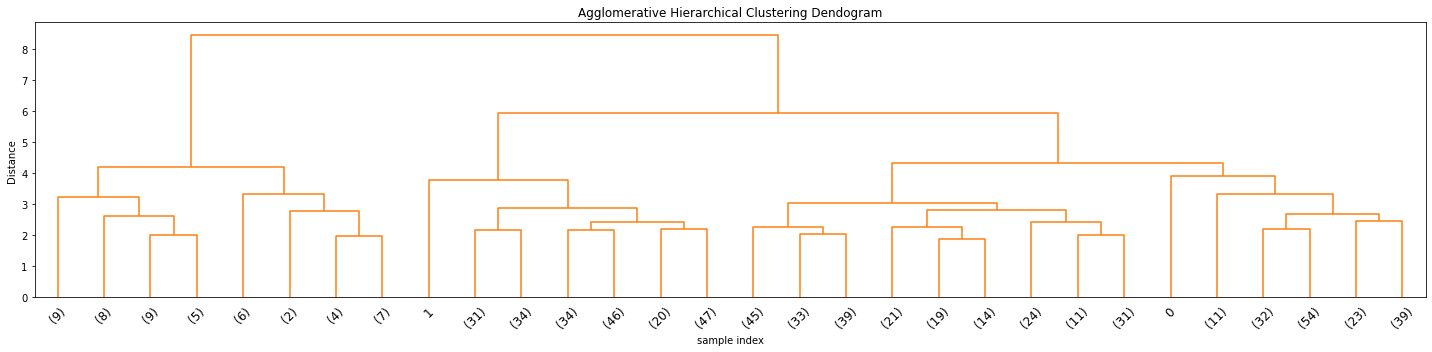

In [67]:
plt.figure(figsize=(20, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=45.,color_threshold = 40, leaf_font_size=12, truncate_mode='lastp')
plt.tight_layout()

In [68]:
Z = linkage(df4scaled, metric='euclidean', method="ward")
c, coph_dists = cophenet(Z , pdist(df4scaled))
c
# c=0.74 is relatively low as compared to other linkage c score

0.7415156284827493

Text(0.5, 1.0, 'selecting k with the silhouette score')

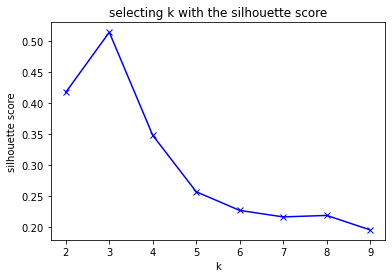

In [69]:
from sklearn.cluster import AgglomerativeClustering
meanDistortions=[]
for k in range (2,10):
    model=AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
    model.fit(df4scaled)
    prediction=model.labels_
    meanDistortions.append(silhouette_score(df4scaled, prediction))


plt.plot(range(2,10), meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.title('selecting k with the silhouette score')

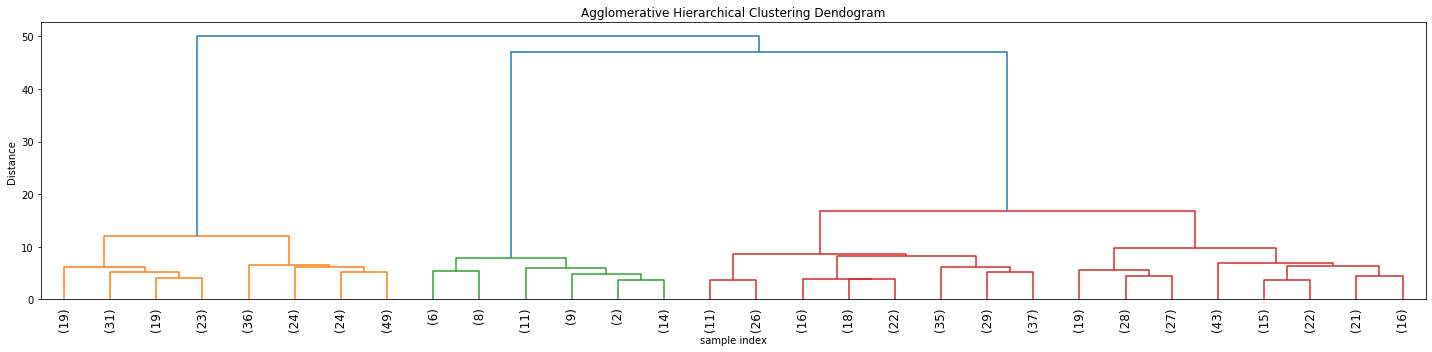

In [70]:
plt.figure(figsize=(20, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=12, truncate_mode='lastp')
plt.tight_layout()

In [71]:
Z = linkage(df4scaled, metric='euclidean', method="average")
c, coph_dists = cophenet(Z , pdist(df4scaled))
c 
#c 0.90 is highest amont three

0.8977080867389372

Text(0.5, 1.0, 'selecting k with the silhouette score')

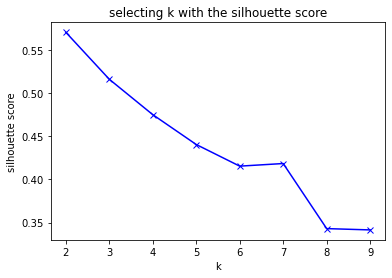

In [72]:
from sklearn.cluster import AgglomerativeClustering
meanDistortions=[]
for k in range (2,10):
    model=AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='average')
    model.fit(df4scaled)
    prediction=model.labels_
    meanDistortions.append(silhouette_score(df4scaled, prediction))


plt.plot(range(2,10), meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.title('selecting k with the silhouette score')

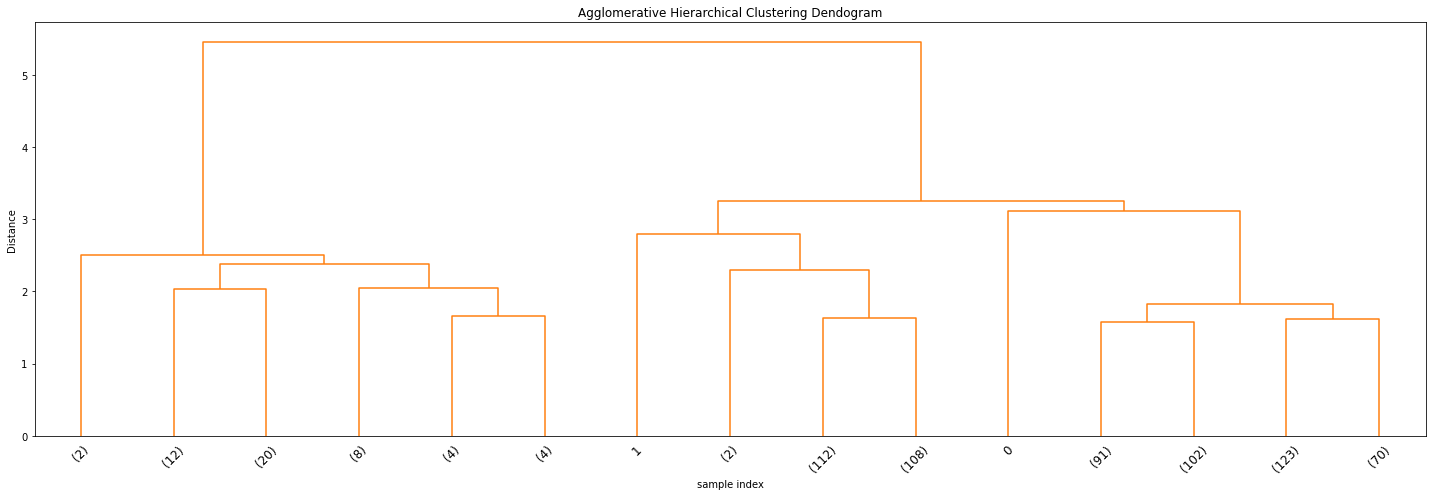

In [73]:
plt.figure(figsize=(20, 7))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, p=15, leaf_rotation=45.,color_threshold = 40, leaf_font_size=12, truncate_mode='lastp')
plt.tight_layout()

In [ ]:
# This method shows two clusters are best option. Most of the data is in one cluster (right side picture of dendrogram.)

In [74]:
df2_m=df2

In [75]:
model=AgglomerativeClustering(n_clusters=2, affinity='euclidean',  linkage='average')
model.fit(df4scaled)
preds=model.labels_
df2_m['Group'] = preds
df4scaled['Group'] = preds

df2_m.groupby('Group').count()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Group,,,,,
0,610,610,610,610,610
1,50,50,50,50,50


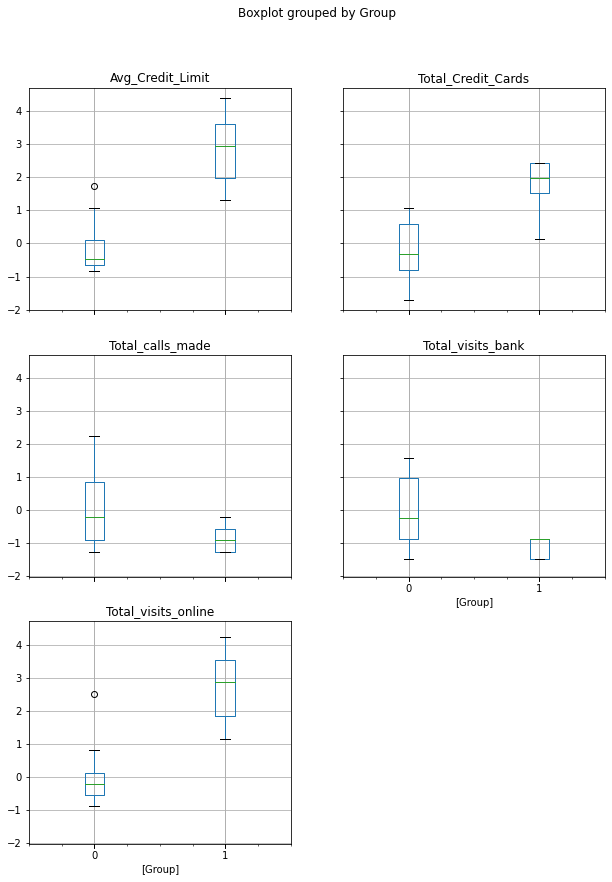

In [76]:
df4scaled.boxplot(by='Group', layout=(3,2), figsize=(10,14));

In [ ]:
#Three groups
# This results explains that users who prefers online bank use or not, again with high credit limit and high credit cards use online option with higher frequency.
# This matches K-Mean results for this group. 

In [ ]:
# Part 4 Questions

In [ ]:
# In persons users- have lowest credit limit and few credit cards, but use in person banking. They are most active users.
#Phone user- telephone conversation and bank use
#Online Users have most credit limit, and most credt cards, They use online facility for banking.

In [ ]:
Well looking at pattern- customer capacpity (credit limit & cards) and behaviour- marketting team need to strategize how to provide onformation to such clients.
# In persons user prefer mail notification and upselling direct communication at bank site.
# Digital information can be used with online users
# Phone users should get infos via phone or text message.
# Over the time- customers pattern can be changed when their credit limit /or no of cards increased- depending how bank approaches these customers and educate them.
# We observed this in 5 duplicate values where upon chnage in status of limit change/Credit cards- subtle change in pattern of bank suuse seen.